In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define data directories
train_dir = r'D:\praxis\Term3\flowers2tt\TRAIN'
test_dir =r'D:\praxis\Term3\flowers2tt\TEST'
check_dir = r'D:\praxis\Term3\flowers2tt\CHECK'

In [12]:
img_width, img_height = 100, 100
input_shape = (img_width, img_height, 3)

# Model parameters
batch_size = 14
epochs = 4
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=4,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=4,
    class_mode='binary'
)

Found 1384 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Initialize the classifier
classifier = Sequential()

# Add the first convolutional layer
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Add the second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# Add the third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
classifier.add(Flatten())

# Add a fully connected layer
classifier.add(Dense(units=128, activation='relu'))

# Add the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 58, 58, 64)        18496     
                                                                 
 flatten_6 (Flatten)         (None, 215296)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               27558016  
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 27586785 (105.24 MB)
Trainable params: 2

In [25]:
# Part 2 - Fitting the CNN to the images
import keras.backend as K
K.clear_session()

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(r'D:\praxis\Term3\flowers2tt\TRAIN',
                        target_size = (64, 64),batch_size = 32, class_mode = 'binary')

test_gen = test_datagen.flow_from_directory(r'D:\praxis\Term3\flowers2tt\TEST',
                        target_size = (64, 64), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1384 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [26]:
print(train_gen.class_indices)

{'rose': 0, 'tulip': 1}


In [27]:
hist = classifier.fit(train_gen, epochs =10, validation_data = test_gen)

Epoch 1/10
44/44 [==============================] - 30s 649ms/step - loss: 0.8649 - accuracy: 0.5665 - val_loss: 0.6662 - val_accuracy: 0.5890
Epoch 2/10
44/44 [==============================] - 23s 517ms/step - loss: 0.6277 - accuracy: 0.6684 - val_loss: 0.6244 - val_accuracy: 0.6712
Epoch 3/10
44/44 [==============================] - 22s 497ms/step - loss: 0.5861 - accuracy: 0.6828 - val_loss: 0.7707 - val_accuracy: 0.5671
Epoch 4/10
44/44 [==============================] - 21s 485ms/step - loss: 0.5917 - accuracy: 0.6777 - val_loss: 0.6148 - val_accuracy: 0.6603
Epoch 5/10
44/44 [==============================] - 21s 486ms/step - loss: 0.5573 - accuracy: 0.7153 - val_loss: 0.6603 - val_accuracy: 0.6603
Epoch 6/10
44/44 [==============================] - 23s 516ms/step - loss: 0.5685 - accuracy: 0.7262 - val_loss: 0.6286 - val_accuracy: 0.6658
Epoch 7/10
44/44 [==============================] - 24s 535ms/step - loss: 0.5506 - accuracy: 0.7197 - val_loss: 0.6066 - val_accuracy: 0.6712

In [28]:
yt_prob = classifier.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

12/12 [==============================] - 1s 80ms/step


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, yt_pred)

0.6684931506849315

Text(0.5, 1.0, 'Accuracy')

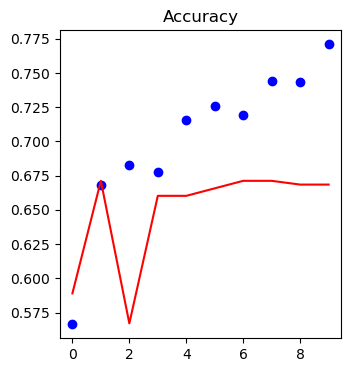

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')

ROC AUC: 0.7402870353690025


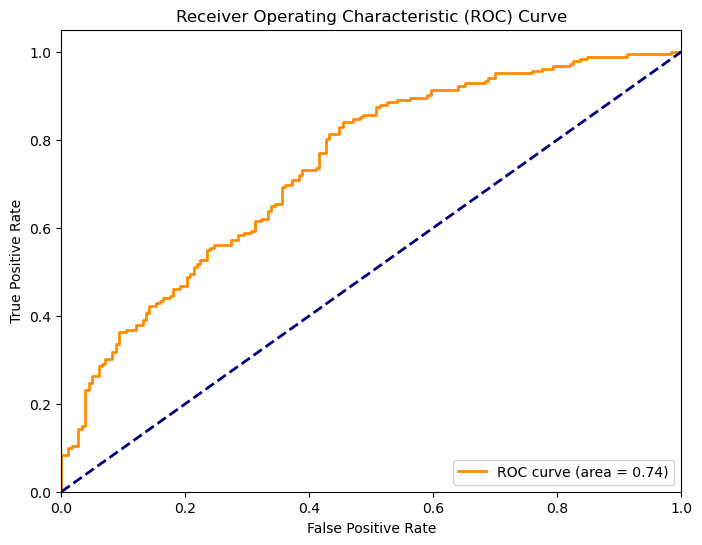

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, yt_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

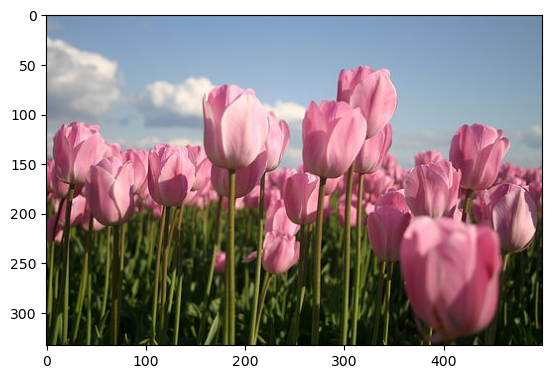

In [45]:
from tensorflow.keras.utils import load_img
test_image = load_img(r'D:\praxis\Term3\flowers2tt\CHECK\38287568_627de6ca20.jpg')
plt.imshow(test_image)
plt.show()

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img(r'D:\praxis\Term3\flowers2tt\CHECK\38287568_627de6ca20.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

if result[0][0] <= 0.5:
    prediction = 'rose'
else:
    prediction = 'tulip'

print('Prediction: ', prediction)

1/1 [==============================] - 1s 597ms/step
Prediction:  tulip


In [48]:
check_directory = r'D:\praxis\Term3\flowers2tt\CHECK'
image_files = [os.path.join(check_directory, file) for file in os.listdir(check_directory) if file.endswith(('.jpg', '.jpeg', '.png'))]

In [49]:
images = []
for img_path in image_files:
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    images.append(img_array)

In [50]:
images = np.vstack(images)

In [51]:
predictions = classifier.predict(images)

1/1 [==============================] - 0s 66ms/step


In [52]:
predicted_labels = ['rose' if pred <= 0.5 else 'tulip' for pred in predictions]

In [53]:
for img_path, label in zip(image_files, predicted_labels):
    print(f'{img_path} - Predicted Label: {label}')

D:\praxis\Term3\flowers2tt\CHECK\100930342_92e8746431_n.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\102501987_3cdb8e5394_n.jpg - Predicted Label: rose
D:\praxis\Term3\flowers2tt\CHECK\10791227_7168491604.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\110472418_87b6a3aa98_m.jpg - Predicted Label: rose
D:\praxis\Term3\flowers2tt\CHECK\11746080_963537acdc.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\11746276_de3dec8201.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\11746367_d23a35b085_n.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\11746452_5bc1749a36.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\118974357_0faa23cce9_n.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\14957470_6a8c272a87_m.jpg - Predicted Label: tulip
D:\praxis\Term3\flowers2tt\CHECK\160954292_6c2b4fda65_n.jpg - Predicted Label: rose
D:\praxis\Term3\flowers2tt\CHECK\174109630_3c544b8a2f.jpg - Predicted Label: rose
